In [1]:
import os
import numpy as np
from keras.optimizers import Adam
from LoadBatch import DataGenerator
from keras import backend as K

from LoadBatch import getimg
from resnext import ResNext, ResNextImageNet
os.environ["CUDA_VISIBLE_DEVICES"]="0,1"

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # 不全部占满显存, 按需分配
session = tf.Session(config=config)

batch_size = 1
nb_classes = 1
nb_epoch = 100

img_rows, img_cols = 512, 512
img_channels = 3

img_dim = (img_channels, img_rows, img_cols) if K.image_dim_ordering() == "th" else (img_rows, img_cols, img_channels)
depth = [3, 4, 6, 3]
cardinality = 32
width = 4

model = ResNextImageNet(img_dim, depth=depth, cardinality=cardinality, width=width, weights=None, classes=nb_classes, weight_decay=0)

path ='/home/data/DR_png/'






/home/power/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import keras 

/home/power/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/power/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/power/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/power/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/power/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.

In [12]:
from keras.utils import multi_gpu_model
# multi_model = multi_gpu_model(model, gpus=2)
multi_model.load_weights('logs/018/model_37-0.050.hdf5')

In [17]:
from LoadBatch import getimg
import cv2
import pandas as pd
txt = pd.read_csv('test/csv/xx.csv')
img = []
for i in range(len(txt)):
    filename = txt['path'][i]
    img.append(cv2.resize(getimg(filename, norm=True), (512,512)))
img = np.array(img)

In [23]:
import os
import time
start = time.time()
for w in os.listdir('weights/'):
    print(w.split('.')[0])
    multi_model.load_weights('weights/'+w)
    re = multi_model.predict(img)
    for r in re:
        print(r[0])
    print('-'*30)
print(time.time()-start)

Pneumothorax
0.576616
0.58218193
0.64370465
0.57710344
0.40870357
0.23487264
0.60315037
0.45797
0.80503166
0.6693746
0.2768521
0.576616
0.58218193
0.64370465
0.33482072
0.06898443
0.66247994
0.021615287
0.17507829
0.34247237
0.5652538
0.4289414
0.81465435
0.40656513
0.3672012
0.66785747
0.23115587
0.58218193
------------------------------
Nodule
0.6821667
0.8481053
0.5928906
0.7337348
0.10756883
0.47063366
0.26920298
0.18150163
0.36987975
0.57394576
0.55552346
0.6821667
0.8481053
0.5928906
0.42145586
0.41705528
0.59521276
0.32762378
0.47790232
0.740153
0.8185322
0.3248579
0.5311758
0.15983018
0.69375414
0.8125149
0.54844993
0.8481053
------------------------------
Mass
0.7166287
0.8010921
0.74144816
0.67883426
0.5552027
0.59462315
0.6598292
0.6816726
0.65689033
0.7729175
0.53887486
0.7166287
0.8010921
0.74144816
0.33228126
0.67151433
0.71852946
0.32218134
0.52951306
0.6253868
0.7000247
0.2656118
0.7374224
0.7536911
0.74849975
0.7512907
0.62680614
0.8010921
-----------------------------

cxr8 11347



11347/11347 [==============================] - 152s 13ms/step
(11347, 1)
cxr8 11347 173
4515 57 116 6659 0.6684023915965116
0.6705202312138728 0.5959369965992483 0.5970741165065656 

sz 328



328/328 [==============================] - 4s 11ms/step
(328, 1)
sz 328 2
133 0 2 193 0.6457055214723927
1.0 0.5920245398773006 0.5945121951219512 

bj 172



172/172 [==============================] - 2s 11ms/step
(172, 1)
bj 172 13
53 6 7 106 0.5679729075955491
0.5384615384615384 0.6666666666666666 0.6569767441860465 

padchest 9968



9774/9774 [==============================] - 110s 11ms/step
(9774, 1)
padchest 9774 125
3204 26 99 6445 0.7880551352471759
0.792 0.6679448647528241 0.6695314098629016 



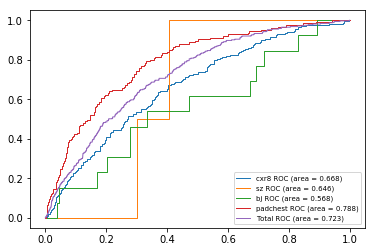

In [5]:
from tqdm import tqdm_notebook
from sklearn.metrics import roc_auc_score,roc_curve,auc
import matplotlib.pyplot as plt
import pandas
data={}
name = 'Fibrosis'
fig, ax = plt.subplots()
total_label = np.array([])
total_result = np.array([])
for file in os.listdir('label/'+name+'/test/'):
    tmp = file.split('.')[0]
    if tmp == 'merge':
        continue
    with open('label/'+name+'/test/'+file, 'r') as f:
        test_lines = f.readlines()
    img = []
    label = []
    print(tmp, len(test_lines))
    for l in tqdm_notebook(test_lines):        
        img_path = path + l.split(' ')[0]
        try:
            tmp_img = getimg(img_path, norm=True)
            tmp_label = np.array(list(map(int, l.split(' ')[1:])))
            if tmp_label == -2:
                tmp_label = np.array([0])
            elif tmp_label == -1 :
                tmp_label = np.array([1])
            img.append(tmp_img)
            label.append(tmp_label)
        except Exception as e:
            continue
    img = np.array(img)
    label = np.array(label)
    result = multi_model.predict(img, verbose=1)

    if not total_label.shape[0]==0:
        total_result=np.concatenate([total_result,result[:,0]])
        total_label =np.concatenate([total_label,label])
    else:
        total_result=result[:,0]
        total_label=label    
    print(label.shape)
    fpr, tpr, thresholds = roc_curve(label[:,0], result[:,0])
    roc_auc = auc(fpr, tpr)
    p = np.arange(len(tpr))
    roc = pandas.DataFrame({'tf' : pandas.Series(tpr+(1-fpr), index=p),'thresholds' : pandas.Series(thresholds, index=p)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[-1:]]
    
    pred_binary = (result[:,0] >=roc_t['thresholds'].values)*1
    gt_binary = label[:,0]
    fp = np.sum((pred_binary > gt_binary)*1)
    fn = np.sum((gt_binary > pred_binary)*1) 
    tp = np.sum((pred_binary == gt_binary)* 1 * ((gt_binary == 1 )* 1))
    tn = np.sum((pred_binary == gt_binary)* 1 * ((gt_binary == 0 )* 1))
    print(tmp,len(result), tp+fn)
    print(fp, fn, tp ,tn, roc_auc)
    print(tp/(tp+fn),tn/(tn+fp),(tp+tn)/(len(label)),'\n')
    ax.plot(fpr, tpr, lw=1, label=tmp+' ROC (area = %0.3f)' % (roc_auc))
fpr, tpr, thresholds = roc_curve(total_label, total_result)
roc_auc = auc(fpr, tpr)
ax.plot(fpr, tpr, lw=1, label='Total ROC (area = %0.3f)' % (roc_auc))
plt.legend(fontsize='x-small')
plt.savefig(name+'_ROC.jpg', bbox_inches='tight', quality = 100,dpi=1000)

In [12]:
multi_model.load_weights('logs/013/model_49-0.13.hdf5')

In [19]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
import matplotlib.pyplot as plt
import pandas
Name = ['CheXpert', 'MIMIC', 'bj', 'CXR8', 'sz', 'PadChest']
total_label = np.array([])
total_result = np.array([])
re = {}
for data_name in Name:
    if not data.get(data_name, 0):
        continue
    print(data_name,len(data[data_name]['img']))
    img = data[data_name]['img']
    label = data[data_name]['label']
    result = multi_model.predict(img, verbose=1)
    if not total_label.shape[0]==0:
        if not data_name == 'PadChest':
            total_result=np.concatenate([total_result,result[:,0]])
            total_label =np.concatenate([total_label,label])
    else:
        total_result=result[:,0]Screenshot from 2019-04-02 16-20-24
        total_label=label
    re[data_name]=result

bj 172
172/172 [==============================] - 16s 91ms/step
CXR8 11347
11347/11347 [==============================] - 132s 12ms/step
sz 292
292/292 [==============================] - 3s 12ms/step
PadChest 986
986/986 [==============================] - 11s 12ms/step


bj 172 1
107 0 1 64 0.3742690058479532
1.0 0.3742690058479532 0.37790697674418605 

CXR8 11347 1916
3308 725 1191 6123 0.6860730193080209
0.6216075156576201 0.6492418619446506 0.6445756587644311 

sz 292 0
292 0 0 0 nan
nan 0.0 0.0 

PadChest 986 44
177 18 26 765 0.6857025670719938
0.5909090909090909 0.8121019108280255 0.8022312373225152 



/home/power/anaconda3/lib/python3.6/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/home/power/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars


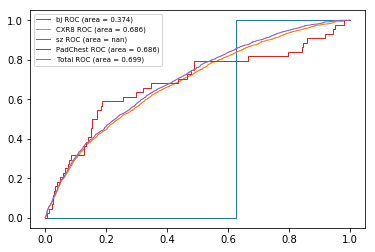

In [22]:
fig, ax = plt.subplots()
for data_name in Name:
    if not data.get(data_name, 0):
        continue
#     print(data_name,len(data[data_name]['img']))
    label = data[data_name]['label']
    fpr, tpr, thresholds = roc_curve(label, re[data_name][:,0])
    roc_auc = auc(fpr, tpr)
    p = np.arange(len(tpr))
    roc = pandas.DataFrame({'tf' : pandas.Series(tpr+(1-fpr), index=p),'thresholds' : pandas.Series(thresholds, index=p)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[-1:]]
    
    pred_binary = (re[data_name][:,0] >=roc_t['thresholds'].values)*1
    gt_binary = label[:,0]
    fp = np.sum((pred_binary > gt_binary)*1)
    fn = np.sum((gt_binary > pred_binary)*1) 
    tp = np.sum((pred_binary == gt_binary)* 1 * ((gt_binary == 1 )* 1))
    tn = np.sum((pred_binary == gt_binary)* 1 * ((gt_binary == 0 )* 1))
    print(data_name,len(data[data_name]['img']), tp+fn)
    print(fp, fn, tp ,tn, roc_auc)
    print(tp/(tp+fn),tn/(tn+fp),(tp+tn)/(len(label)),'\n')
    ax.plot(fpr, tpr, lw=1, label=data_name+' ROC (area = %0.3f)' % (roc_auc))
########################################################
fpr, tpr, thresholds = roc_curve(total_label, total_result)
roc_auc = auc(fpr, tpr)
ax.plot(fpr, tpr, lw=1, label='Total ROC (area = %0.3f)' % (roc_auc))
plt.legend(fontsize='x-small')
plt.savefig('Infiltration_ROC.jpg', bbox_inches='tight', quality = 100,dpi=1000)

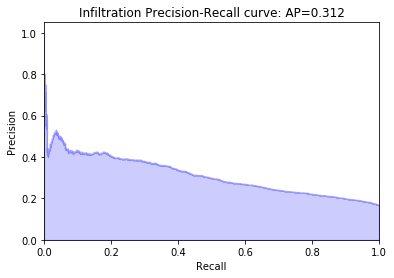

In [20]:
from sklearn.metrics import average_precision_score,precision_recall_curve
from sklearn.utils.fixes import signature
average_precision = average_precision_score(total_label, total_result)
precision, recall, _ = precision_recall_curve(total_label, total_result)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Infiltration Precision-Recall curve: AP={average_precision:0.3f}')
plt.savefig('Infiltration_PR.jpg', bbox_inches='tight', quality = 100,dpi=1000)

In [60]:
for file in os.listdir('single_total/test/'):
    tmp = file.split('_')[0]
    if (tmp == 'test'):
        continue
    with open('single_total/test/'+file, 'r') as f:
        test_lines = f.readlines()
    img = []
    label = []
    print(file.split('_')[0], len(test_lines))
    for l in tqdm_notebook(test_lines):        
        img_path = path + l.split(' ')[0]
        try:
            tmp_img = getimg(img_path, 512,norm=True)
            tmp_label = np.array(list(map(int, l.split(' ')[1:])))
            if tmp_label == -2:
                tmp_label =np.array([0])
            img.append(tmp_img)
            label.append(tmp_label)
        except Exception as e:
            continue
    img = np.array(img)
    label = np.array(label)
    data[file.split('_')[0]]={"img":img,"label":label}

134

In [1]:
import tensorflow as tf
import keras.backend as K

In [2]:
x = K.ones((5,5,5))

In [9]:
round(0.7)

1